In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets, linear_model, metrics, tree
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_selection import chi2, SelectKBest, f_regression
import xgboost as xgb

In [2]:
#Importing the datasets
df_CP_redeemed = pd.read_csv('CP_Redeemed_as_on_25-07-2024.csv')
df_Debt_redeemed = pd.read_csv('Debt_Redeemed_as_on_25.07.2024.csv')
df_entire_list_CP = pd.read_csv('list_of_Commercial_Papers_including_Redeemed_25-07-2024.csv')
df_entire_list_DI = pd.read_csv('list_of_Debt_Instruments_(including_Redeemed)_as_on_25.07.2024.csv')


In [3]:
#Making a copy
df_CP_redeemed_copy1 = pd.read_csv('CP_Redeemed_as_on_25-07-2024.csv')
df_Debt_redeemed_copy1 = pd.read_csv('Debt_Redeemed_as_on_25.07.2024.csv')
df_entire_list_CP_copy1 = pd.read_csv('list_of_Commercial_Papers_including_Redeemed_25-07-2024.csv')
df_entire_list_DI_copy1 = pd.read_csv('list_of_Debt_Instruments_(including_Redeemed)_as_on_25.07.2024.csv')

In [4]:
#Display first 5 rows of data
df_CP_redeemed.head()

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id,Issuing & Paying Agent(IPA),Company Address,IPA Demat Details
0,MURUGAPPA HOLDINGS LIMITED,INE187C14115,MURUGAPPA HOLDINGS LIMITED 31D CP 13MAR17,9.000000e+08,500000,10/02/17,13/03/17,A1+,"ICRA,DTD-03.02.2017",UNLISTED,KFIN TECHNOLOGIES LIMITED\nIN200842,MR. TANMAY MATHKAR \nAVP \nHDFC BANK LTD \nLOD...,MR. P. R. EASWARAN \nMANAGER (SECRETARIAL) \nM...,IN300126 \nHDFC BANK LTD \n11179990
1,CARATLANE TRADING PRIVATE LIMITED,INE015Y14146,CARAT LANE TRADING PRIVATE LIMITED 91D CP 06AUG21,2.400000e+08,500000,07/05/21,06/08/21,A1+,ICRA DTD 14.12.2020,"LISTED-THE STOCK EXCHANGE, MUMBAI",KFIN TECHNOLOGIES LIMITED\nIN200800,MR. RAVI TOMAR \nCHEIF MANAGER \nICICI BANK LI...,Ms.Ahona Das Gupta \nMANAGER- LEGAL AND COMPAN...,IN301348 \nICICI BANK LIMITED \n20001190
2,PVR INOX LIMITED,INE191H14447,PVR INOX LIMITED 89D CP 15JUN20,1.000000e+09,500000,18/03/20,15/06/20,A1+,"ICRA,DTD-16.03.2020",UNLISTED,KFIN TECHNOLOGIES LIMITED\nIN200800,MR. VIRENDER KR. ARYA \nMANAGER \nHDFC BANK LI...,Mr. Mukesh Kumar \nCompany Secretary & Complia...,IN300126 \nHDFC BANK \n11179990
3,IIFL FINANCE LIMITED,INE530B14BC3,IIFL FINANCE LIMITED 7D CP 15NOV21,NaN,500000,08/11/21,15/11/21,"A1+,A1+","ICRA-26.10.21,CRISIL-26.10.21",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED\nIN200094,Mr.Bhavin Shah \n \nICICI Bank Limited \n1ST ...,MS. MAULI AGARWAL \nCOMPANY SECRETARY & COMPLI...,IN301348 \nICICI BANK LIMITED \n20001190
4,CARATLANE TRADING PRIVATE LIMITED,INE015Y14138,CARAT LANE TRADING PRIVATE LIMITED 91D CP 07JUN21,5.000000e+08,500000,08/03/21,07/06/21,A1+,ICRA DTD 14.12.2020,"LISTED-THE STOCK EXCHANGE, MUMBAI",KFIN TECHNOLOGIES LIMITED\nIN200800,MR. RAVI TOMAR \nCHEIF MANAGER \nICICI BANK LI...,Ms.Ahona Das Gupta \nMANAGER- LEGAL AND COMPAN...,IN301348 \nICICI BANK LIMITED \n20001190


In [5]:
#Display first 5 rows of data
df_Debt_redeemed.head()

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,CERTIFICATE_NOS,TOTAL_ISSUE_SIZE,REGISTRAR_WITH_BP_ID_NO,ADDRESS_WHERE_PHYSICAL_SECURITIES_IS_TO_BE_SENT,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,REMARKS
0,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LTD,INE871D08CS3,7.50% Unsecured Non-Convertible Debenture. Ser...,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LT...,1000.00,1000.0,30-Mar-02,30-Apr-20,7.50%,ON MATURITY,NaN,NaN,68540000.0,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MR. V SRINIVAS RAO SENIOR MANAGER (CORPORATE S...,No,NaN,NaN,
1,SHRIRAM PROPERTIES LIMITED,INE217L07107,15.25% SECURED UNRATED UNLISTED REDEEMABLE NO...,SHRIRAM PROPERTIES LIMITED SR B 15.25 NCD 15J...,1000000.00,1000000.0,14-Jun-22,15-Jun-23,15.25,PAYABLE QAURTERLY,Put: Call:,NaN,300000000.0,IN200800 KFIN TECHNOLOGIES LIMITED,Mr. M R V Subrahmanyam General Manager KFIN TE...,No,NaN,NaN,
2,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.0,20-Mar-19,20-Mar-24,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,NaN,917551000.0,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MS. SHANTI GOPALAKRISHNAN ? LINK IN TIME INDIA...,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,N.A. N.A.
3,WB IDFC TX,INE740F08173,11.85% Unsecured Government Guaranteed Taxable...,WB IDFC TX 11.85 BD 31OT12 FV RS 1 LAC LOA UPT...,100000.00,100000.0,01-Nov-02,31-Oct-12,11.85%,"Half Yearly, 31st March & 30th September",NaN,1 to 7164,NaN,IN200035 KFIN TECHNOLOGIES LIMITED,Mr. P.A. Varghese General Manager Karvy Comput...,No,NaN,NaN,NaN
4,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07835,6.68% Secured Redeemable Non-Convertible Taxab...,POWER GRID CORPORATION OF INDIA LIMITED 15/L 6...,1250000.00,1250000.0,23-Feb-04,23-Feb-19,6.68%,"Annually, 23rd February",NaN,N.A.,NaN,IN200504 BEETAL FINAN.AND COMPU.,Mr. Subhabrata Biswas General Manager MCS Limi...,No,INDIANOVERSEASBANK,AAA ICRA LIMITED DT 02-06-2004,NaN


In [6]:
#Display first 5 rows of data
df_entire_list_CP.head()

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id,Issuing & Paying Agent(IPA),Company Address,IPA Demat Details
0,ADITYA BIRLA FASHION AND RETAIL LIMITED,INE647O14FF2,ADITYA BIRLA FASHION AND RETAIL LIMITED 91D CP...,2.000000e+09,500000,28/05/24,27/08/24,"A1+,A1+","CRISIL-30-04-24, ICRA-10-05-24","LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED\nIN200094,MR. TANMAY MATHKAR/MR. JIGARKUMAR MEHTA \nDEPU...,Mr. Anil Malik \nCompany Secretary \nAditya Bi...,IN300126 \nHDFC BANK LIMITED \n11179990
1,HLL LIFECARE LIMITED,INE156G14020,HLL LIFECARE LIMITED 90D CP 11MY04,NaN,500000,11/02/04,11/05/04,A1+,ICRA Ltd.,UNLISTED,CAMEO CORPORATE SERV LTD\nIN200176,Mr. G. Sivakumar \nAsst. General Manager \nSTA...,Mr. G. N. Nair \nExecutive Director(Finance) -...,IN301444 \nSTATE BANK OF INDIA \n80031996
2,TATA STEEL LIMITED,INE081A14EV3,TATA STEEL LIMITED 87D CP 26SEP24,1.500000e+10,500000,01/07/24,26/09/24,"A1+,A1+","ICRA-24-06-24,IND-25-06-24","LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED\nIN200125,MR. BABU CHINNAKONDA \nSenior Vice President \...,MR. PARVATHEESAM K \nCOMPANY SECRETARY \nTATA ...,IN300126 \nHDFC BANK LIMITED \n11179990
3,UNITECH LIMITED,INE694A14122,UNITECH LIMITED 356D CP 11NV08,2.100000e+09,500000,21/11/07,11/11/08,FI+ (ind),FITCH,UNLISTED,ALANKIT ASSIGNMENTS LTD\nIN200086,Mr. Sushil Kumar \nDy manager - Corporate Bank...,Mr. Deepak Jain \nCompany Secretary \nALANKIT ...,IN300484 \nAXIS Bank Ltd \n10824096
4,ASHOKA BUILDCON LIMITED,INE442H14394,ASHOKA BUILDCON LIMITED 89D CP 26AUG24,5.000000e+08,500000,29/05/24,26/08/24,A1+,ICRA-15-05-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED\nIN200094,Ms. DHANASHREE SATAM \nDEPUTY MANAGER \nHDFC B...,MR. SANDEEP P BAMB \nDGM - FINANCE \nASHOKA BU...,IN300126 \nHDFC BANK LIMITED \n11180008


In [7]:
#Display first 5 rows of data
df_entire_list_DI.head()

,COMPANY,ISIN,NAME_OF_THE_INSTRUMENT,DESCRIPTION_IN_NSDL,ISSUE_PRICE,FACE_VALUE,DATE_OF_ALLOTMENT,REDEMPTION,COUPON_RATE,FREQUENCY_OF_THE_INTEREST_PAYMENT,PUT_CALL_OPTION,CERTIFICATE_NOS,TOTAL_ISSUE_SIZE,REGISTRAR_WITH_BP_ID_NO,ADDRESS_WHERE_PHYSICAL_SECURITIES_IS_TO_BE_SENT,DEFAULTED_IN_REDEMPTION,NAME_OF_DEBENTURE,CREDIT_RATING_CREDIT_RATING_AGENCY,REMARKS
0,POWER GRID CORPORATION OF INDIA LIMITED,INE752E07GN7,8.90% Secured Non Convertible Non Cumulative ...,POWER GRID CORPORATION OF INDIA LIMITED 8.9 BD...,1250000.00,1250000.0,25-Feb-10,25-Feb-23,8.90%,Annually on 25th February,NaN,NaN,1.706250e+09,IN200504 BEETAL FINAN.AND COMPU.,MR. AMARJIT SENIOR MANAGER MCS SHARE TRANSFER ...,No,IDBI TRUSTEESHIP SERVICES LIMITED,AAA CRISIL RATINGS LIMITED DT 07-06-2009,
1,ANAND RATHI GLOBAL FINANCE LIMITED,INE093J08302,NIFTY 50 INDEX LINKED UNSECURED UNRATED UNLIS...,ANAND RATHI GLOBAL FINANCE LIMITED SR I BR NCD...,100000.00,100000.0,15-Jun-20,14-Jun-25,NIFTY 50 INDEX LINKED,PAYABLE ON MATURITY i.e.14/06/2025.,Put: N.A Call: N.A,1-1600,1.600000e+08,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MR. GANESH JADHAV AVP DEPOSIROTY OPERATION LIN...,No,IDBI Trusteeship Services Limited,NaN,N.A N.A
2,R.J. WAREHOUSING PRIVATE LIMITED,INE0AHL08025,RESET RATE UNSECURED UNLISTED UNRATED OPTIONAL...,R.J. WAREHOUSING PRIVATE LIMITED SR 1 RR OCD 1...,400.00,400.0,10-Oct-19,10-Oct-29,RESET RATE - REFER REMARKS,N.A,Put: 30 DAYS FROM THE DATE OF NOTICE. Call: N.A,363844-400356,1.460520e+07,IN200301 RCMC SHARE REGISTRY,MR. PANKAJ SOOD AUTHORISED SIGNATORY R.J. WARE...,No,NaN,NaN,CONVERTIBLE DETAILS-TO BE CONVERTED INTO EQUIT...
3,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,INE503V08016,7.75% UNSECURED RATED LISTED NON CONVERTIBLE S...,STAR UNION DAI-ICHI LIFE INSURANCE COMPANY LIM...,1000000.00,1000000.0,24-Nov-21,24-Nov-31,7.75%,"PAYABLE ON ANNUALLY BASIS ON 24/11/2022,24/11/...",Put: Call: THE ISSUER SHALL HAVE THE RIGHT TO...,1-1250,1.250000e+09,IN200800 KFIN TECHNOLOGIES LIMITED,MR. S P VENUGOPAL Vice President KFIN TECHNOLO...,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 03-11-2021,"PARTIAL REDMEPTION ON 24/11/2026,24/11/2027 AN..."
4,MUTHOOT FINANCE LIMITED,INE414G07DG0,10% SECURED RATED LISTED NON CONVERTIBLE DEBE...,MUTHOOT FINANCE LIMITED SR XIX OPT VI 10 NCD 2...,1091.87,1000.0,20-Mar-19,20-Mar-24,10%,ANNUALLY I.E FIRST INTEREST ON 20 MARCH 20 AND...,Put: N.A. Call: N.A.,NaN,9.175510e+08,IN200094 LINK INTIME INDIA PRIVATE LIMITED,MS. SHANTI GOPALAKRISHNAN ? LINK IN TIME INDIA...,No,IDBI Trusteeship Services Limited,AA ICRA LIMITED DT 30-01-2019,N.A. N.A.


# Working with the datasets of commercial papers

In [8]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [9]:
#dimensions of data
df_CP_redeemed.shape

(426, 14)

In [10]:
#dimensions of data
df_entire_list_CP.shape
#we will use this dataset

(2073, 14)

In [11]:
#describe data
df_entire_list_CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company Name                 2073 non-null   object 
 1   ISIN                         2073 non-null   object 
 2   Description in NSDL          2073 non-null   object 
 3   Issue Value                  1693 non-null   float64
 4   Face Value                   2073 non-null   int64  
 5   Issue date                   2073 non-null   object 
 6   Maturity date                2073 non-null   object 
 7   Credit Rating                2066 non-null   object 
 8   Credit Rating Agency         2066 non-null   object 
 9   Listing status               2073 non-null   object 
 10  R & T Agent & BP Id          2073 non-null   object 
 11  Issuing & Paying Agent(IPA)  2073 non-null   object 
 12  Company Address              2073 non-null   object 
 13  IPA Demat Details 

In [12]:
df_entire_list_CP.columns

Index(['Company Name', 'ISIN', 'Description in NSDL', 'Issue Value',
       'Face Value', 'Issue date', 'Maturity date', 'Credit Rating',
       'Credit Rating Agency', 'Listing status', 'R & T Agent & BP Id',
       'Issuing & Paying Agent(IPA)', 'Company Address', 'IPA Demat Details'],
      dtype='object')

In [13]:
# Columns to drop
columns_to_drop = ['Issuing & Paying Agent(IPA)', 'Company Address', 'IPA Demat Details']
df_entire_list_CP.drop(columns=columns_to_drop, inplace=True)

In [14]:
#Setting the datatype as string: 'R & T Agent & BP Id'
df_entire_list_CP['R & T Agent & BP Id'] = df_entire_list_CP['R & T Agent & BP Id'].astype(str)

In [15]:
df_entire_list_CP['R & T Agent & BP Id'] = df_entire_list_CP['R & T Agent & BP Id'].str.replace('\n', ' ', regex=False)

In [16]:
df_entire_list_CP['R & T Agent & BP Id'] = df_entire_list_CP['R & T Agent & BP Id'].apply(str)

In [17]:
df_entire_list_CP.dtypes

Company Name             object
ISIN                     object
Description in NSDL      object
Issue Value             float64
Face Value                int64
Issue date               object
Maturity date            object
Credit Rating            object
Credit Rating Agency     object
Listing status           object
R & T Agent & BP Id      object
dtype: object

In [18]:
#Setting dates to datetime type to manipulation 
df_entire_list_CP['Issue date'] = pd.to_datetime(df_entire_list_CP['Issue date'])
df_entire_list_CP['Maturity date'] = pd.to_datetime(df_entire_list_CP['Maturity date'])

In [19]:
# Fill missing values or drop rows/columns as needed
df_entire_list_CP.dropna(subset=['Credit Rating'], inplace=True)

In [20]:
# Fill missing values or drop rows/columns as needed
df_entire_list_CP.dropna(subset=['Issue Value'], inplace=True)

In [21]:
#Changing the display format for issue value
df_entire_list_CP['Issue Value'] = df_entire_list_CP['Issue Value'].apply(lambda x: '{:.2f}'.format(x))

# 1 Credit rating correlation with issue date and face and issue value
# 2 Correlation with issue date and face and issue value

In [22]:
df_entire_list_CP['Issue Value'] = df_entire_list_CP['Issue Value'].astype(float)

# working on 1

In [23]:
df_entire_list_CP['Credit Rating'].unique()

array(['A1+,A1+', 'FI+ (ind)', 'A1+', 'A1', 'A2', 'A2+', 'A3', 'A1+ (SO)',
       'A3+', 'A1,A1', 'A1,A1+', 'A1 +', 'BWR A1+', 'A1+, ICRA'],
      dtype=object)

In [24]:
df_entire_list_CP['Credit Rating Agency'].unique()

array(['CRISIL-30-04-24, ICRA-10-05-24', 'ICRA-24-06-24,IND-25-06-24',
       'FITCH', 'ICRA-15-05-24', 'CARE, DTD-22.02.2019',
       'CARE, DTD-19.04.2019', 'IND-16.08.21,CRISIL-16.08.21',
       'ICRA-07-05-24, CRISIL-07-05-24', 'CARE-25-04-24,CRISIL-25-04-24',
       'CARE, DT-25.06.2018', 'CRISIL-20-06-24,CARE-24-05-24',
       'CRISIL-13-05-24', 'CRISIL-02-07-24, ICRA-10-05-24',
       'CARE-03-06-24,IND-31-05-24', 'CARE-26-03-24,CRISIL-27-03-24',
       'IND-26.05.21,CRISIL-18.06.21', 'CRISIL-30-04-24,IND-22-05-24',
       'CRISIL-02-02-24,IND-31-01-24', 'CRISIL-29-02-24,CARE-29-02-24',
       'IND-18-03-24', 'CRISIL-29-02-24,IND-29-02-24', 'CRISIL-12-04-24',
       'CRISIL-30-04-24,IND-18-06-24', 'CARE-06-06-24',
       'CARE-29-02-24,CRISIL-29-02-24', 'CRISIL-01-04-24,IND-24-04-24',
       'IND-25-06-24,ICRA-24-06-24', 'CARE, DT-26.02.2018',
       'CRISIL-08-02-24,CARE-22-02-24', 'CRISIL-03-04-24,CARE-03-04-24',
       'CARE-23-05-24', 'CARE-24-05-24,CRISIL-25-04-24',
       

In [25]:
list = ['CRISIL', 'ICRA', 'IND', 'CARE', 'BRICK WORK', 'BWR', 'INF', 'ACU']

In [26]:
#LIST of CRAs: CRISIL, ICRA, IND, CARE, BRICK WORK, BWR, INF, ACU

In [27]:
df_entire_list_CP[df_entire_list_CP['Credit Rating']=='BWR A1+']

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id
1466,RELIANCE HOME FINANCE LIMITED,INE217K14EA6,RELIANCE HOME FINANCE LIMITED 363D CP 13APR20,440000000.00,500000,2019-04-16,2020-04-13,BWR A1+,"BRICKWORK ,DTD-18.02.2019",UNLISTED,KFIN TECHNOLOGIES LIMITED IN200842
1477,RELIANCE HOME FINANCE LIMITED,INE217K14DZ5,RELIANCE HOME FINANCE LIMITED 304D CP 14FEB20,410000000.00,500000,2019-04-16,2020-02-14,BWR A1+,BRICKWORK DTD 18.02.2019,UNLISTED,KFIN TECHNOLOGIES LIMITED IN200842
1548,RELIANCE HOME FINANCE LIMITED,INE217K14DY8,RELIANCE HOME FINANCE LIMITED 244D CP 16DEC19,390000000.00,500000,2019-04-16,2019-12-16,BWR A1+,BRICKWORK DTD 18.02.2019,UNLISTED,KFIN TECHNOLOGIES LIMITED IN200842


In [28]:
df_entire_list_CP[df_entire_list_CP['Credit Rating']=='A1+']

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id
4,ASHOKA BUILDCON LIMITED,INE442H14394,ASHOKA BUILDCON LIMITED 89D CP 26AUG24,500000000.00,500000,2024-05-29,2024-08-26,A1+,ICRA-15-05-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094
5,COX AND KINGS LIMITED,INE008I14OA2,COX AND KINGS LIMITED 89D CP 16JUL19,450000000.00,500000,2019-04-18,2019-07-16,A1+,"CARE, DTD-22.02.2019",UNLISTED,KFIN TECHNOLOGIES LIMITED IN200800
6,COX AND KINGS LIMITED,INE008I14OK1,COX AND KINGS LIMITED 30D CP 28JUN19,650000000.00,500000,2019-05-29,2019-06-28,A1+,"CARE, DTD-19.04.2019",UNLISTED,KFIN TECHNOLOGIES LIMITED IN200800
7,COX AND KINGS LIMITED,INE008I14OR6,COX AND KINGS LIMITED 42D CP 06AUG19,50000000.00,500000,2019-06-25,2019-06-08,A1+,"CARE, DTD-19.04.2019",UNLISTED,KFIN TECHNOLOGIES LIMITED IN200800
12,HIMADRI SPECIALITY CHEMICAL LIMITED,INE019C14250,HIMADRI SPECIALITY CHEMICAL LIMITED 65D CP 27S...,150000000.00,500000,2018-07-24,2018-09-27,A1+,"CARE, DT-25.06.2018",UNLISTED,S. K. INFOSOLUTIONS PRIVATE LIMITED IN200596
...,...,...,...,...,...,...,...,...,...,...,...
2041,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LTD,INE871D14JE6,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LT...,2000000000.00,500000,2018-02-02,2019-01-15,A1+,"ICRA,DTD- 29.12.2017",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
2051,STANDARD CHARTERED SECURITIES (INDIA) LIMITED,INE472H14326,STANDARD CHARTERED SECURITIES (INDIA) LIMITED ...,250000000.00,500000,2024-03-19,2024-09-16,A1+,ICRA-15-02-24,"LISTED-THE STOCK EXCHANGE, MUMBAI","MCS SHARE TRANSFER AGENT LIMITED, MUMBAI IN200922"
2059,AVENDUS FINANCE PRIVATE LIMITED,INE177R14080,AVENDUS FINANCE PRIVATE LIMITED 272D CP 03SEP24,250000000.00,500000,2023-06-12,2024-03-09,A1+,CRISIL-28-11-23,UNLISTED,NSDL DATABASE MANAGEMENT LIMITED IN200963
2062,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LTD,INE871D14JT4,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LT...,500000000.00,500000,2018-03-27,2019-05-03,A1+,"ICRA,DTD- 23.03.2018",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094


In [29]:
df_entire_list_CP[df_entire_list_CP['Credit Rating Agency']=='ACU-07-05-24,INF-28-03-24']

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id
234,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HR3,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,250000000.00,500000,2024-06-13,2024-12-09,"A1+,A1+","ACU-07-05-24,INF-28-03-24","LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094
267,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HQ5,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 123D...,450000000.00,500000,2024-06-13,2024-10-14,"A1+,A1+","ACU-07-05-24,INF-28-03-24","LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094
268,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HK8,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 90D ...,35000000.00,500000,2024-10-05,2024-08-08,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
283,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HO0,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,50000000.00,500000,2024-05-06,2024-04-09,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
299,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HL6,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,100000000.00,500000,2024-05-17,2024-08-16,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
310,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HS1,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,570000000.00,500000,2024-06-26,2024-09-25,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
313,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HP7,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,500000000.00,500000,2024-04-06,2024-03-09,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
358,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HN2,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 91D ...,10000000.00,500000,2024-05-27,2024-08-26,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094
365,TRUST INVESTMENT ADVISORS PRIVATE LIMITED,INE723X14HM4,TRUST INVESTMENT ADVISORS PRIVATE LIMITED 178D...,20000000.00,500000,2024-05-27,2024-11-21,"A1+,A1+","ACU-07-05-24,INF-28-03-24",UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094


In [30]:
#Define a function to split the credit rating
def split_credit_rating(rating):
    parts = rating.split(',')
    if len(parts) > 1:
        return parts[0].strip(), parts[1].strip()
    else:
        return parts[0].strip(), None

# Apply the function to create two new columns
df_entire_list_CP[['Credit Rating', 'Credit Rating Two']] = df_entire_list_CP['Credit Rating'].apply(split_credit_rating).apply(pd.Series)

In [31]:
# Apply the function to create two new columns
df_entire_list_CP[['Credit Rating Agency', 'Credit Rating Agency Two']] = df_entire_list_CP['Credit Rating Agency'].apply(split_credit_rating).apply(pd.Series)

In [32]:
df_entire_list_CP

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id,Credit Rating Two,Credit Rating Agency Two
0,ADITYA BIRLA FASHION AND RETAIL LIMITED,INE647O14FF2,ADITYA BIRLA FASHION AND RETAIL LIMITED 91D CP...,2000000000.00,500000,2024-05-28,2024-08-27,A1+,CRISIL-30-04-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094,A1+,ICRA-10-05-24
2,TATA STEEL LIMITED,INE081A14EV3,TATA STEEL LIMITED 87D CP 26SEP24,15000000000.00,500000,2024-01-07,2024-09-26,A1+,ICRA-24-06-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200125,A1+,IND-25-06-24
3,UNITECH LIMITED,INE694A14122,UNITECH LIMITED 356D CP 11NV08,2100000000.00,500000,2007-11-21,2008-11-11,FI+ (ind),FITCH,UNLISTED,ALANKIT ASSIGNMENTS LTD IN200086,None,None
4,ASHOKA BUILDCON LIMITED,INE442H14394,ASHOKA BUILDCON LIMITED 89D CP 26AUG24,500000000.00,500000,2024-05-29,2024-08-26,A1+,ICRA-15-05-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094,None,None
5,COX AND KINGS LIMITED,INE008I14OA2,COX AND KINGS LIMITED 89D CP 16JUL19,450000000.00,500000,2019-04-18,2019-07-16,A1+,CARE,UNLISTED,KFIN TECHNOLOGIES LIMITED IN200800,None,DTD-22.02.2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,STANDARD CHARTERED CAPITAL LIMITED,INE403G14RN5,STANDARD CHARTERED CAPITAL LIMITED 364D CP 09S...,250000000.00,500000,2023-11-09,2024-09-09,A1+,CRISIL-24-08-23,"LISTED-THE STOCK EXCHANGE, MUMBAI",NSDL DATABASE MANAGEMENT LIMITED IN200963,A1+,ICRA-24-08-23
2069,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LTD,INE871D14JD8,INFRASTRUCTURE LEASING & FINANCIAL SERVICES LT...,1300000000.00,500000,2018-02-02,2019-01-02,A1+,ICRA,UNLISTED,LINK INTIME INDIA PRIVATE LIMITED IN200094,None,DTD- 29.12.2017
2070,HDFC SECURITIES LIMITED,INE700G14KS8,HDFC SECURITIES LIMITED 91D CP 20SEP24,2250000000.00,500000,2024-06-21,2024-09-20,A1+,CARE-23-05-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",NSDL DATABASE MANAGEMENT LIMITED IN200963,A1+,ICRA-21-05-24
2071,360 ONE PRIME LIMITED,INE248U14PN9,360 ONE PRIME LIMITED 90D CP 07AUG24,2000000000.00,500000,2024-09-05,2024-07-08,A1+,ICRA-26-04-24,"LISTED-THE STOCK EXCHANGE, MUMBAI",LINK INTIME INDIA PRIVATE LIMITED IN200094,A1+,CRISIL-03-05-24


In [33]:
df_entire_list_CP['Credit Rating Two'].unique()

array(['A1+', None, 'A1', 'ICRA'], dtype=object)

In [34]:
df_entire_list_CP['Credit Rating Agency'][df_entire_list_CP['Credit Rating Two'] == 'ICRA'] = 'ICRA, DATED 12.03.2018'

/var/folders/ry/_nz83x3n4bs_tbgpdp1fdby00000gn/T/ipykernel_29058/171433914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entire_list_CP['Credit Rating Agency'][df_entire_list_CP['Credit Rating Two'] == 'ICRA'] = 'ICRA, DATED 12.03.2018'


In [35]:
#Changing ICRA value in Credit Rating Two to none
df_entire_list_CP['Credit Rating Two'][df_entire_list_CP['ISIN'] == 'INE271G14118'] = None

/var/folders/ry/_nz83x3n4bs_tbgpdp1fdby00000gn/T/ipykernel_29058/1207710306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entire_list_CP['Credit Rating Two'][df_entire_list_CP['ISIN'] == 'INE271G14118'] = None


In [36]:
df_entire_list_CP[df_entire_list_CP['ISIN'] == 'INE271G14118']

,Company Name,ISIN,Description in NSDL,Issue Value,Face Value,Issue date,Maturity date,Credit Rating,Credit Rating Agency,Listing status,R & T Agent & BP Id,Credit Rating Two,Credit Rating Agency Two
1530,MAHADHAN AGRITECH LIMITED,INE271G14118,MAHADHAN AGRITECH LIMITED 60D CP 12JUN18,250000000.00,500000,2018-04-13,2018-12-06,A1+,"ICRA, DATED 12.03.2018",UNLISTED,KFIN TECHNOLOGIES LIMITED IN200800,None,None


In [37]:
df_entire_list_CP['Credit Rating Two'].unique()

array(['A1+', None, 'A1'], dtype=object)

In [38]:
df_entire_list_CP['Credit Rating'].unique()

array(['A1+', 'FI+ (ind)', 'A1', 'A2', 'A2+', 'A3', 'A1+ (SO)', 'A3+',
       'A1 +', 'BWR A1+'], dtype=object)

In [39]:
#Standardising the 'A1 +' the values to 'A1+'
df_entire_list_CP['Credit Rating'][df_entire_list_CP['Credit Rating'] == 'A1 +'] = 'A1+'

/var/folders/ry/_nz83x3n4bs_tbgpdp1fdby00000gn/T/ipykernel_29058/2434723113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entire_list_CP['Credit Rating'][df_entire_list_CP['Credit Rating'] == 'A1 +'] = 'A1+'


In [40]:
df_entire_list_CP['Credit Rating'].unique()

array(['A1+', 'FI+ (ind)', 'A1', 'A2', 'A2+', 'A3', 'A1+ (SO)', 'A3+',
       'BWR A1+'], dtype=object)

In [41]:
#Specifying a ranking for ratings:
#1)A1+, FI+ (ind), BWR A1+, A1+ (SO)
#2)A1
#3)A2+
#4)A2
#5)A3+
#6)A3

In [42]:
# A Dictionary for the ranking
rating_rank_map = {
    'A1+': 1, 
    'FI+ (ind)': 1, 
    'BWR A1+': 1, 
    'A1+ (SO)': 1,
    'A1': 2,
    'A2+': 3,
    'A2': 4,
    'A3+': 5,
    'A3': 6
}
#Applying the ranking mapping
df_entire_list_CP['Rating Rank'] = df_entire_list_CP['Credit Rating'].map(rating_rank_map)

In [43]:
# A Dictionary for the ranking
rating_rank_map_two = {
    'A1+': 1, 
    'A1': 2,
    None: 0,
}

#Applying the ranking mapping
df_entire_list_CP['Rating Rank Two'] = df_entire_list_CP['Credit Rating Two'].map(rating_rank_map_two)

In [44]:
df_entire_list_CP['Rating Score'] = df_entire_list_CP['Credit Rating Two']

In [45]:
#creating a ranking of the rating:
# Function to calculate Rating Score
def calculate_rating_score(row):
    if row['Rating Rank Two'] == 0:  # Case where there is no second rating
        return row['Rating Rank']
    else:
        return (row['Rating Rank'] + row['Rating Rank Two']) / 2

# Apply the function to create the Rating Score column
df_entire_list_CP['Rating Score'] = df_entire_list_CP.apply(calculate_rating_score, axis=1)

# Now that we have a rating score, we can move on with the analysis of the ratings with the issue value and face value

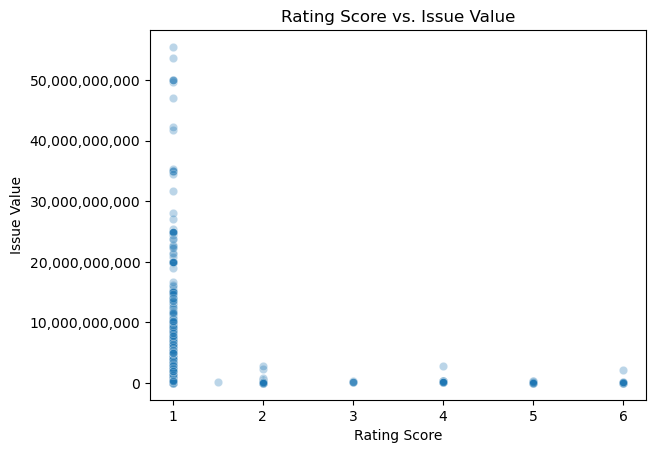

In [46]:
# Scatter plot for Rating Score vs Issue Value
sns.scatterplot(x='Rating Score', y='Issue Value', data=df_entire_list_CP, alpha=0.3)
plt.title('Rating Score vs. Issue Value')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))

plt.show()

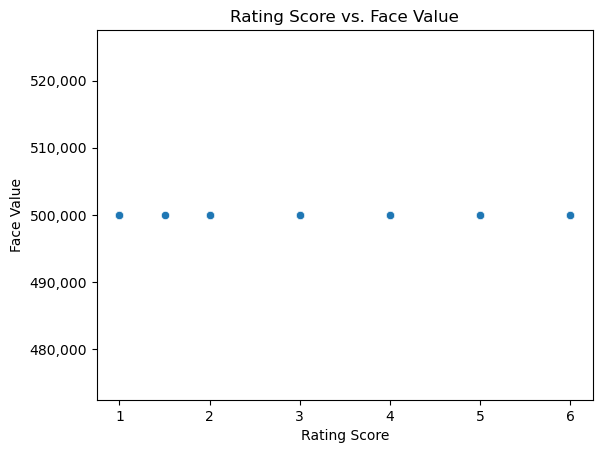

In [47]:
# Scatter plot for Rating Score vs Face Value
sns.scatterplot(x='Rating Score', y='Face Value', data=df_entire_list_CP)
plt.title('Rating Score vs. Face Value')

def format_large_ticks(x, pos):
    """Format numbers with commas."""
    return '{:,}'.format(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_ticks))
plt.show()

In [48]:
#Correlation analysis:
correlation_issue_value = df_entire_list_CP['Rating Score'].corr(df_entire_list_CP['Issue Value'])
print(f"Correlation between Rating Score and Issue Value: {correlation_issue_value}")

Correlation between Rating Score and Issue Value: -0.10574712941211302


In [49]:
correlation_matrix = df_entire_list_CP[['Rating Score', 'Issue Value']].corr()
print(correlation_matrix)

              Rating Score  Issue Value
Rating Score          1.00        -0.11
Issue Value          -0.11         1.00


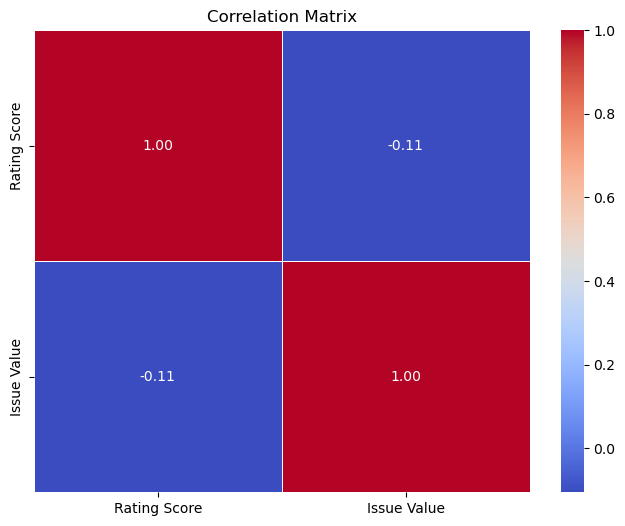

In [50]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

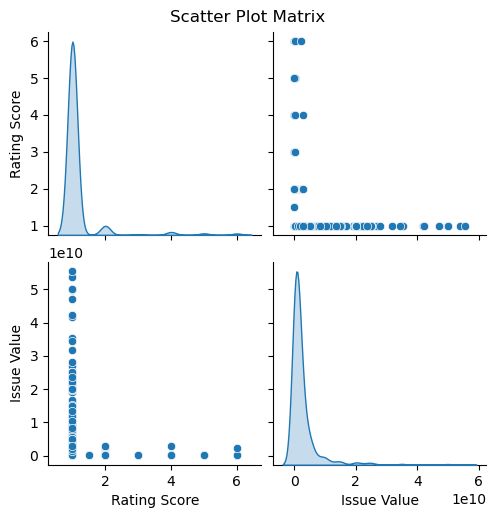

In [51]:
# Plot scatter plot matrix
sns.pairplot(df_entire_list_CP[['Rating Score', 'Issue Value']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)



plt.show()

In [52]:
#Checking the correlation between rating score and issue value when the rating score is not 1, so that we can see what happens when you have ratings that are not A1+

# Filter out rows where Rating Score is 1
df_filtered = df_entire_list_CP[df_entire_list_CP['Rating Score'] != 1]

# Calculate the correlation
correlation = df_filtered[['Rating Score', 'Issue Value']].corr().loc['Rating Score', 'Issue Value']

print(f"Correlation between Rating Score (excluding 1) and Issue Value: {correlation:.2f}")

Correlation between Rating Score (excluding 1) and Issue Value: -0.03


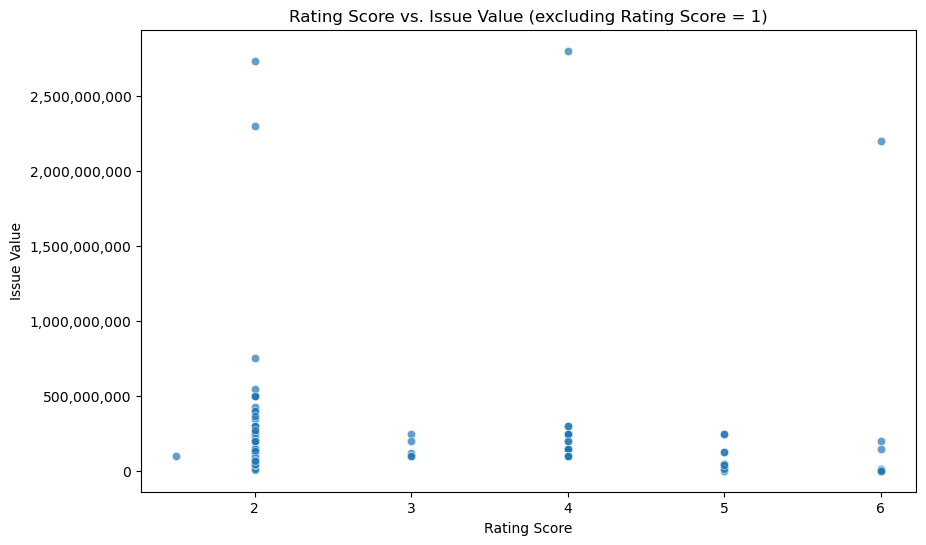

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating Score', y='Issue Value', data=df_filtered, alpha=0.7)
plt.title('Rating Score vs. Issue Value (excluding Rating Score = 1)')
plt.xlabel('Rating Score')
plt.ylabel('Issue Value')

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(int(x))))

plt.show()

In [54]:
#Grouped Statistics
grouped_stats = df_entire_list_CP.groupby('Rating Score').agg({
    'Issue Value': ['mean', 'median', 'std', 'count'],
})

print(grouped_stats)

               Issue Value                                  
                      mean        median           std count
Rating Score                                                
1.00         2930746185.86 1100000000.00 5624887103.17  1567
1.50          100000000.00  100000000.00           NaN     1
2.00          242130136.99  105000000.00  415318059.41    73
3.00          154000000.00  120000000.00   67675697.26     5
4.00          297826086.96  200000000.00  550098805.35    23
5.00           85416666.67   50000000.00   85751976.74    12
6.00          236818181.82    6500000.00  654687073.06    11


In [55]:
#Time series analysis

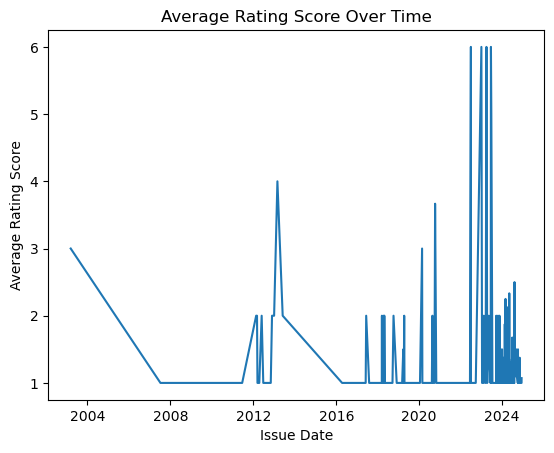

In [56]:
#Doing a time series analysis using issue date
time_series_data = df_entire_list_CP.groupby('Issue date')['Rating Score'].mean()

plt.plot(time_series_data)
plt.title('Average Rating Score Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Average Rating Score')


plt.show()

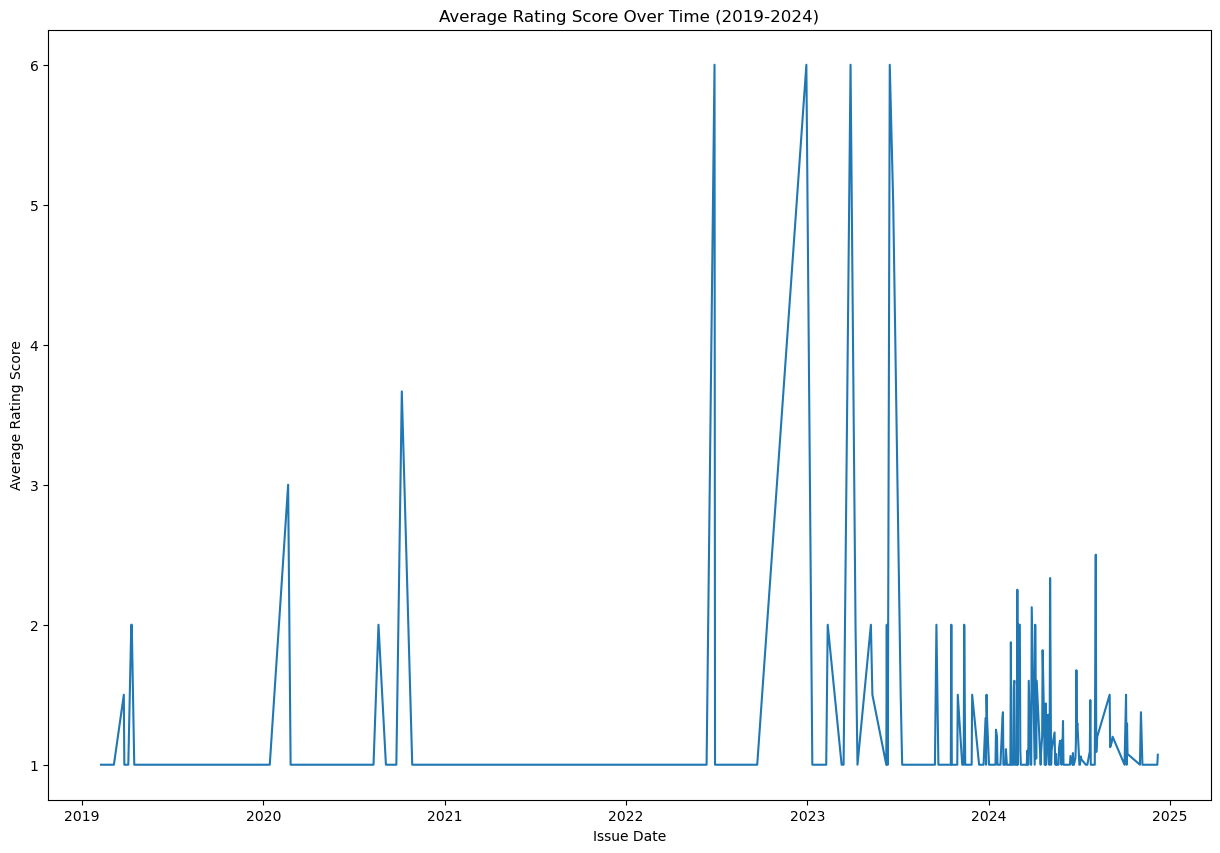

In [57]:
#Doing a time series analysis using issue date for 2019 to 2024
# Filter data for the period 2019 to 2024
df_filtered = df_entire_list_CP[(df_entire_list_CP['Issue date'] >= '2019-01-01') & (df_entire_list_CP['Issue date'] <= '2024-12-31')]

# Create time series data
time_series_data = df_filtered.groupby('Issue date')['Rating Score'].mean()

# Plot
plt.figure(figsize=(15, 10))
plt.plot(time_series_data)

# Add titles and labels
plt.title('Average Rating Score Over Time (2019-2024)')
plt.xlabel('Issue Date')
plt.ylabel('Average Rating Score')



# Optional: Adjust the plot to make room for labels
#plt.tight_layout()

plt.show()

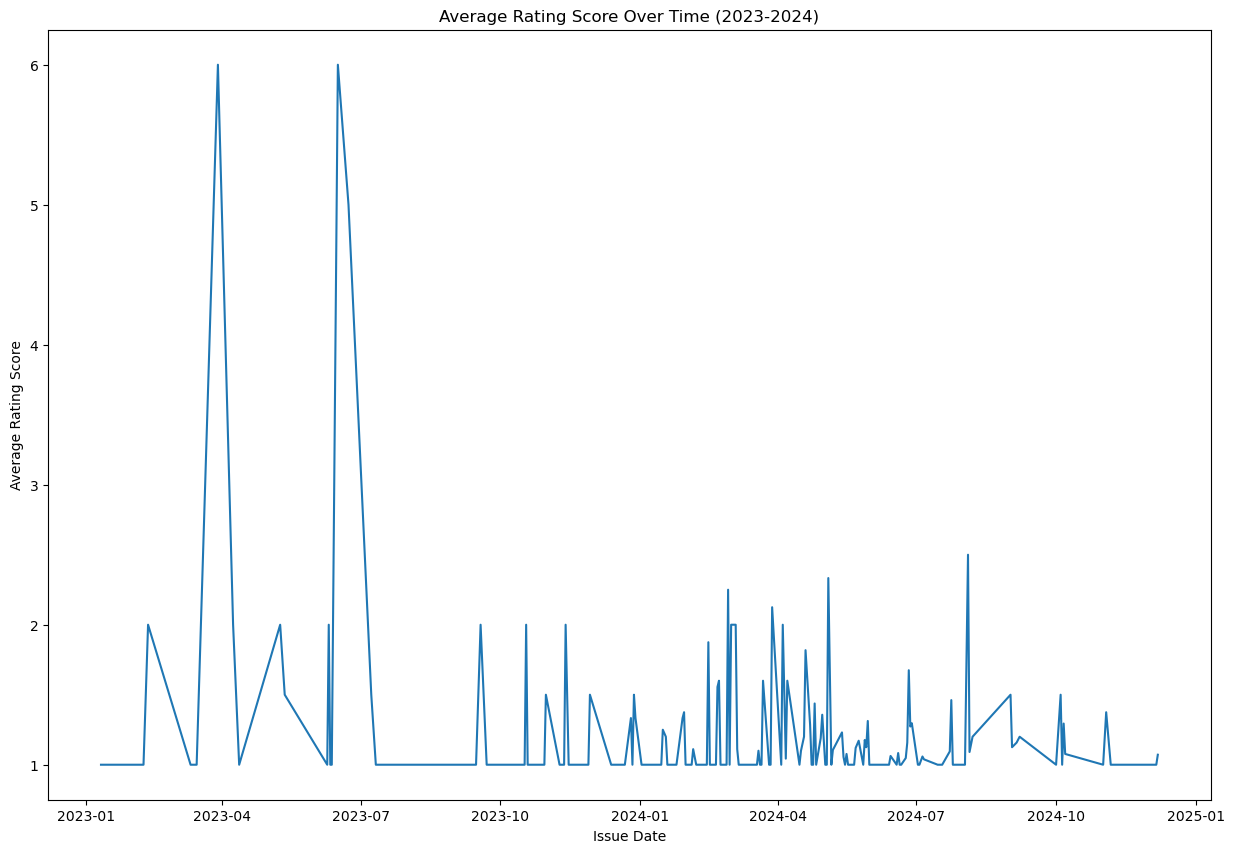

In [58]:
#Doing a time series analysis using issue date for 2023 to 2024
# Filter data for the period 2019 to 2024
df_filtered = df_entire_list_CP[(df_entire_list_CP['Issue date'] >= '2023-01-01') & (df_entire_list_CP['Issue date'] <= '2024-12-31')]

# Create time series data
time_series_data = df_filtered.groupby('Issue date')['Rating Score'].mean()

# Plot
plt.figure(figsize=(15, 10))
plt.plot(time_series_data)

# Add titles and labels
plt.title('Average Rating Score Over Time (2023-2024)')
plt.xlabel('Issue Date')
plt.ylabel('Average Rating Score')



# Optional: Adjust the plot to make room for labels
#plt.tight_layout()

plt.show()

# Identifying Change points for the time series analysis

In [62]:
import ruptures as rpt

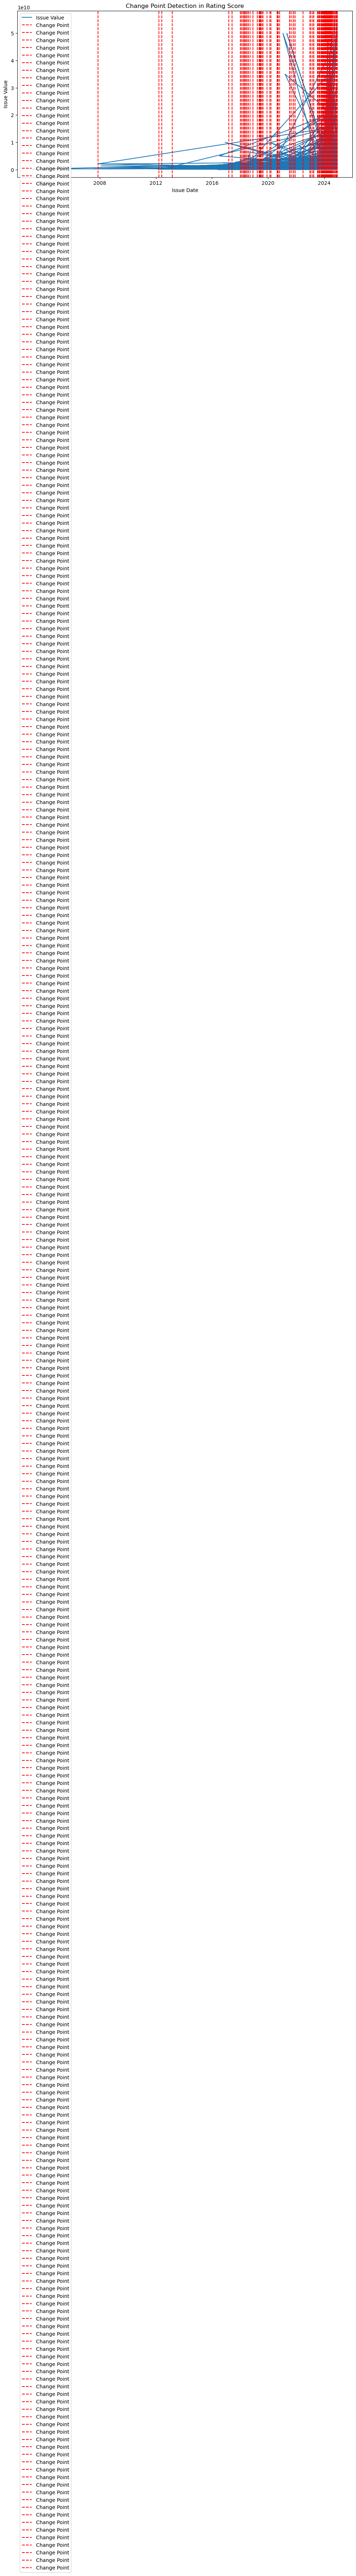

In [73]:
# Setting data
data = df_entire_list_CP['Issue Value'].values

# Perform Change Point Detection
model = "l2"  # Model for cost function (least squares)
algo = rpt.Pelt(model=model).fit(data)
result = algo.predict(pen=1000)  # Adjust the penalty term for sensitivity

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df_entire_list_CP['Issue date'], df_entire_list_CP['Issue Value'], label='Issue Value')
for change in result[:-1]:  # Exclude the last point as it's the end of the series
    plt.axvline(x=df_entire_list_CP['Issue date'].iloc[change], color='r', linestyle='--', label='Change Point')
plt.title('Change Point Detection in Rating Score')
plt.xlabel('Issue Date')
plt.ylabel('Issue Value')
plt.legend()
plt.show()

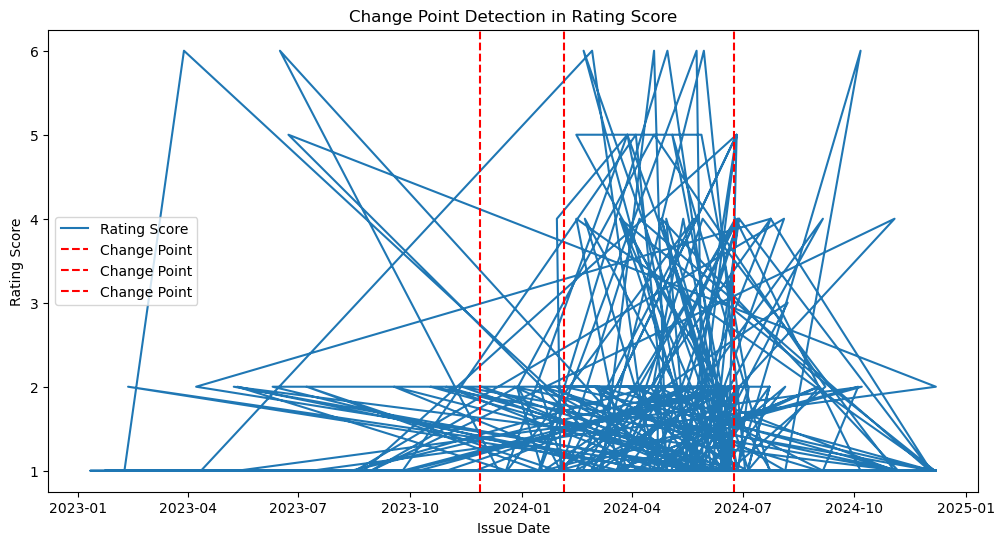

In [68]:
# Setting data
data = df_filtered['Rating Score'].values

# Perform Change Point Detection
model = "l2"  # Model for cost function (least squares)
algo = rpt.Pelt(model=model).fit(data)
result = algo.predict(pen=5)  # Adjust the penalty term for sensitivity

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Issue date'], df_filtered['Rating Score'], label='Rating Score')
for change in result[:-1]:  # Exclude the last point as it's the end of the series
    plt.axvline(x=df_filtered['Issue date'].iloc[change], color='r', linestyle='--', label='Change Point')
plt.title('Change Point Detection in Rating Score')
plt.xlabel('Issue Date')
plt.ylabel('Rating Score')
plt.legend()
plt.show()